In [3]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [7]:
fname = "2021_1_26.hdf"
dset_names = [
    "1611690004 check noise with laser lights on ch3 to 60 dB",
    "1611690074 check noise with laser lights off ch3 to 60 dB",
    "1611690128 check noise without laser lights off ch3 to 60 dB",
    "1611690196 check noise without laser lights on ch3 to 60 dB" 
]
devices = {}

In [8]:
names = [
    "laser on lights on",
    "laser on lights off",
    "laser off lights off",
    "laser off lights on"
]

In [13]:
stds_pmt = []
stds_pd = []
stds_pdn = []

for dset_name in dset_names:
    pmt_channel = 1
    pd_channel = 2
    pdn_channel = 3

    pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

    print(f'{len(pxie)} samples')

    n = pxie[1].shape[0]

    t = np.arange(0,n,1)/100

    pmt_data = np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])

    stds_pmt.append(np.std(pmt_data, axis = 1))
    stds_pd.append(np.std(pd_data, axis = 1))
    stds_pdn.append(np.std(pdn_data, axis = 1))

300 samples
300 samples
300 samples
300 samples


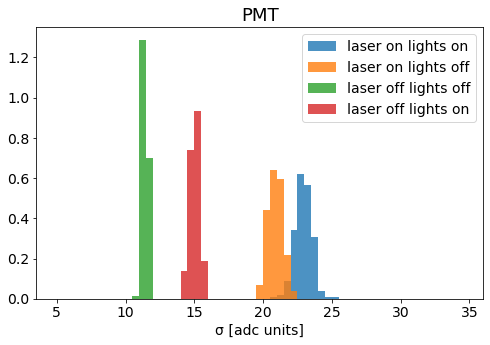

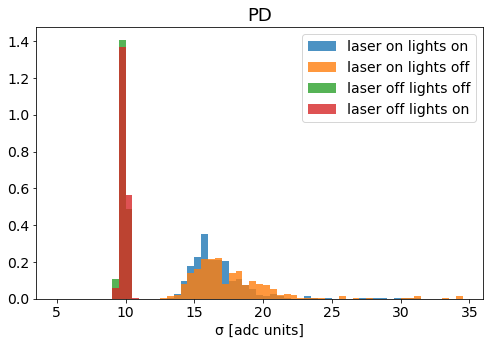

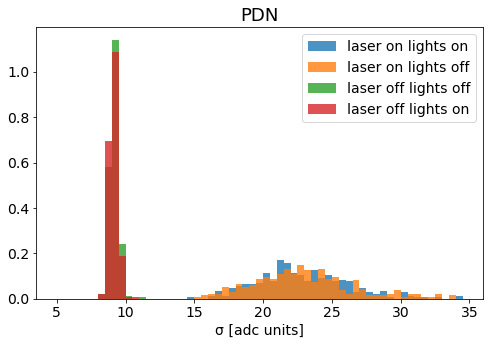

In [43]:
for dset in ['pmt', 'pd', 'pdn']:
    bins = np.arange(5,35,0.5)
    fig, ax = plt.subplots(figsize = (8,5))
    for name,std in zip(names, eval(f"stds_{dset}")):
        ax.hist(std, bins = bins, label = name, density = True, alpha = 0.8)

    ax.set_xlabel('σ [adc units]')

    ax.set_title(dset.upper())
    ax.legend(fontsize = 14)
    set_fontsize(ax, 14)

In [44]:
ptp_pmt = []
ptp_pd = []
ptp_pdn = []

for dset_name in dset_names:
    pmt_channel = 1
    pd_channel = 2
    pdn_channel = 3

    pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

    print(f'{len(pxie)} samples')

    n = pxie[1].shape[0]

    t = np.arange(0,n,1)/100

    pmt_data = np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])

    ptp_pmt.append(np.ptp(pmt_data, axis = 1))
    ptp_pd.append(np.ptp(pd_data, axis = 1))
    ptp_pdn.append(np.ptp(pdn_data, axis = 1))

300 samples
300 samples
300 samples
300 samples


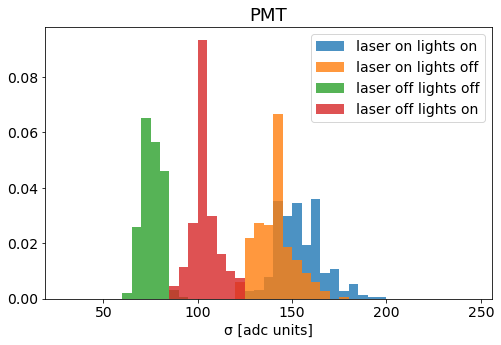

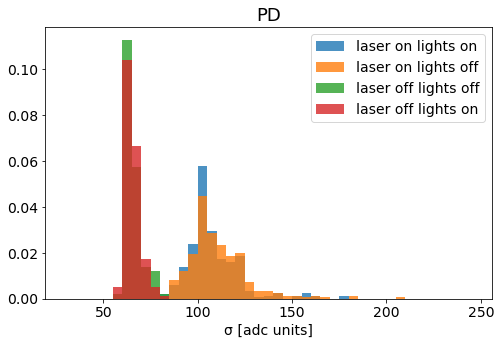

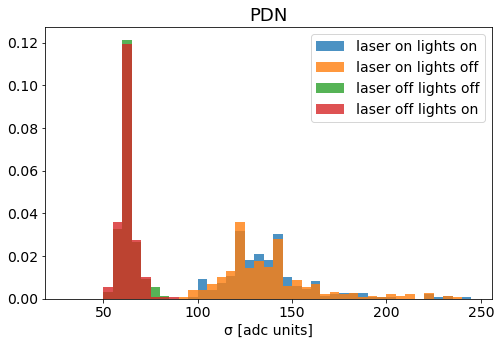

In [45]:
for dset in ['pmt', 'pd', 'pdn']:
    bins = np.arange(30,250,5)
    fig, ax = plt.subplots(figsize = (8,5))
    for name,ptp in zip(names, eval(f"ptp_{dset}")):
        ax.hist(ptp, bins = bins, label = name, density = True, alpha = 0.8)

    ax.set_xlabel('σ [adc units]')

    ax.set_title(dset.upper())
    ax.legend(fontsize = 14)
    set_fontsize(ax, 14)

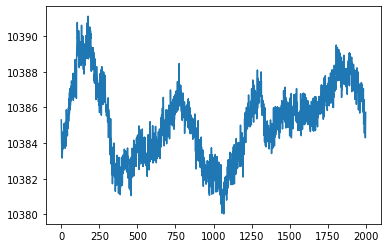

In [146]:
dset_name = "1611690004 check noise with laser lights on ch3 to 60 dB"
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])

plt.plot(pd_data.mean(axis = 0))

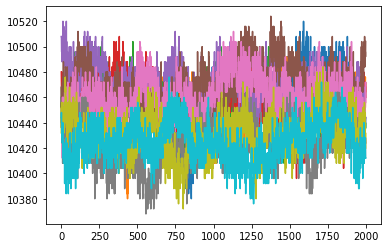

In [147]:
for idx in range(10):
    plt.plot(pd_data[idx,:])

### Fake signal on top of real data

In [222]:
sig_size = np.linspace(100,2e4,10)

amplitudes = []
data_signals = []
for s in sig_size:
    signal = norm.pdf(x, 150, 40)*s
    amplitudes.append(signal.max())
    for data in pd_data:
        data_signals.append(data+signal)
data_signals = np.asarray(data_signals)

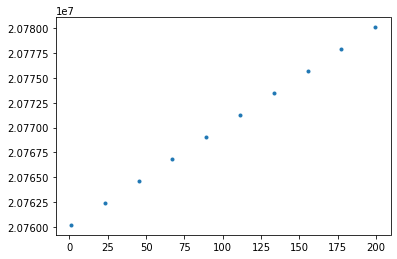

In [223]:
# average all 300 traces
plt.plot(amplitudes, np.trapz(data_signals.reshape(-1,300,dset_len).mean(axis = 1), axis = 1), '.')

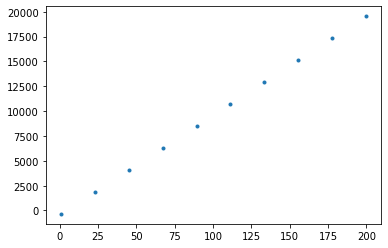

In [224]:
# with background subtraction
bg_subtracted = data_signals - data_signals[:, -1000:].mean(axis = 1)[:,np.newaxis]
plt.plot(amplitudes, np.trapz(bg_subtracted.reshape(-1,300,dset_len).mean(axis = 1), axis = 1), '.')

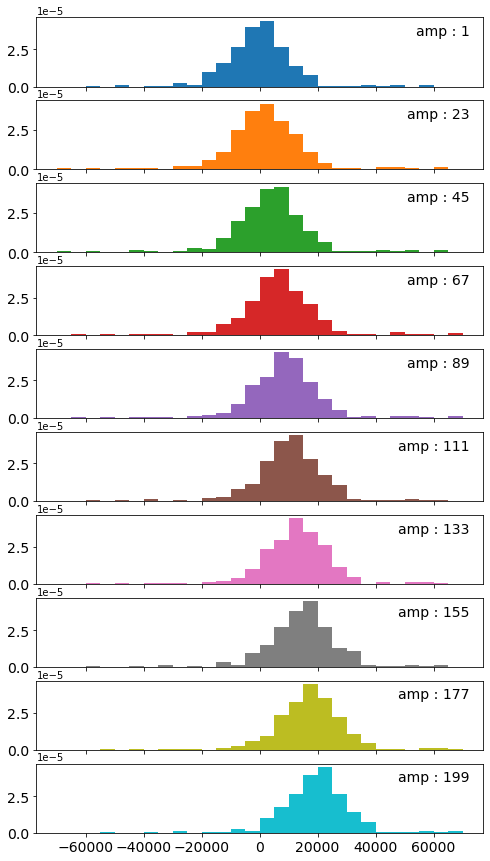

In [232]:
integrals = np.trapz(bg_subtracted.reshape(-1,300,dset_len), axis = 2)

fig, axes = plt.subplots(nrows = 10, figsize = (8,15), sharex = True)

bins = np.arange(-70000,70000+1,5000)
for idx, (name, std) in enumerate(zip(amplitudes, integrals)):
    axes[idx].hist(std, label = name, density = True, bins = bins, color = f'C{idx}')
    axes[idx].text(0.97, 0.9, f'amp : {name:.0f}', transform = axes[idx].transAxes, fontsize = 14,
                  va = 'top', ha = 'right')
    set_fontsize(axes[idx], 14)

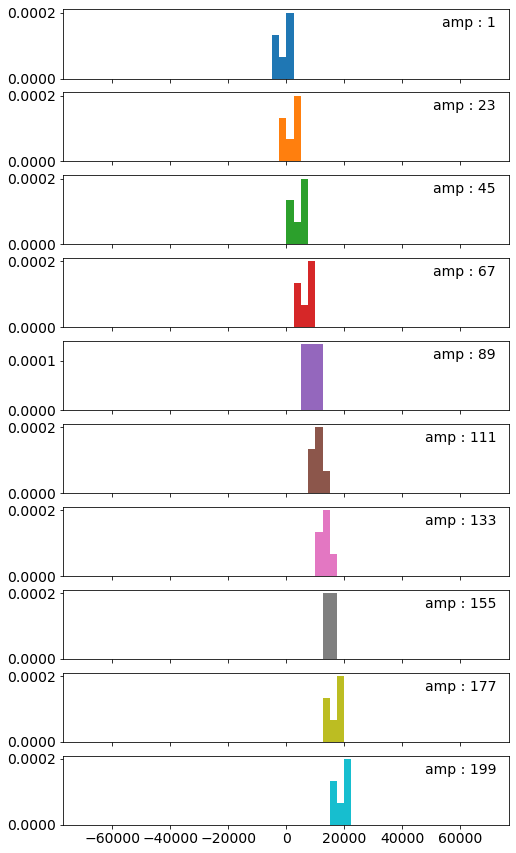

In [235]:
nbunched = 50

integrals = np.trapz(bg_subtracted.reshape(-1,300//nbunched, nbunched,dset_len).mean(axis = 2), axis = 2)

fig, axes = plt.subplots(nrows = 10, figsize = (8,15), sharex = True)

bins = np.arange(-70000,70000+1,2500)
for idx, (name, std) in enumerate(zip(amplitudes, integrals)):
    axes[idx].hist(std, label = name, density = True, bins = bins, color = f'C{idx}')
    axes[idx].text(0.97, 0.9, f'amp : {name:.0f}', transform = axes[idx].transAxes, fontsize = 14,
                  va = 'top', ha = 'right')
    set_fontsize(axes[idx], 14)

## Fake Data

In [131]:
signal_laser = 1e4
signal_nolaser = -200
noise_laser = 15
noise_nolaser = 10

nswitch = 50
dset_len = 2000

x = np.arange(0,dset_len,1)
signal = norm.pdf(x, 100, 20)*dset_len

M = np.zeros(dset_len//nswitch)
M[::2] = 1
M[1::2] = -1

In [132]:
dat = []
for idx in range(dset_len//nswitch):
    if idx%2 == 0:
        sig = signal_laser + np.random.normal(scale = noise_laser,size = nswitch) + signal[idx*nswitch:(idx+1)*nswitch]
    else:
        sig = signal_nolaser + np.random.normal(scale = noise_nolaser,size = nswitch)
    dat.extend(sig)
dat = np.asarray(dat)

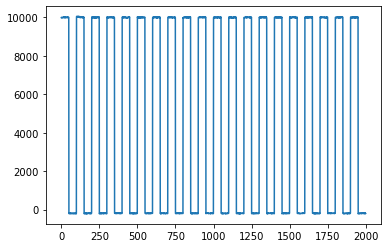

In [133]:
plt.plot(dat)

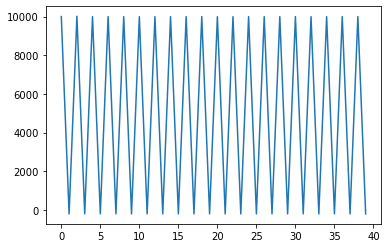

In [134]:
plt.plot(dat.reshape(-1,50).mean(axis = 1))

In [135]:
np.sum(M*dat.reshape(-1,50).mean(axis = 1))

204024.7498971707

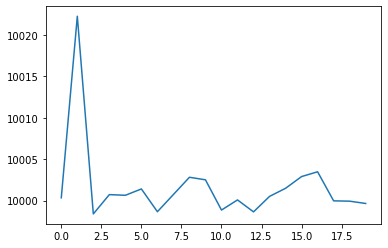

In [117]:
plt.plot(dat.reshape(-1,50).mean(axis = 1)[::2])

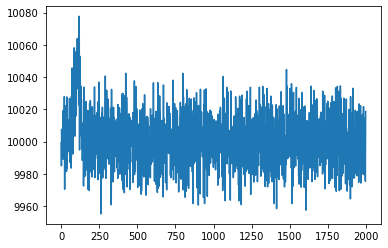

In [119]:
S = signal_laser + np.random.normal(scale = noise_laser,size = 2000) + signal
plt.plot(S)

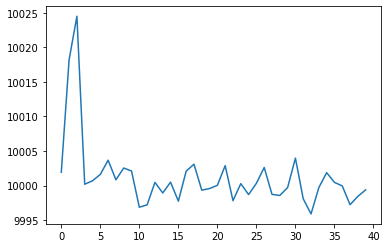

In [122]:
plt.plot(S.reshape(-1,50).mean(axis = 1))

In [141]:
signals = []
integrals = []
sig_size = np.linspace(100,1e4,50)
for s in sig_size:
    signal = norm.pdf(x, 100, 20)*s
    
    dat = []
    for idx in range(dset_len//nswitch):
        if idx%2 == 0:
            sig = signal_laser + np.random.normal(scale = noise_laser,size = nswitch) + signal[idx*nswitch:(idx+1)*nswitch]
        else:
            sig = signal_nolaser + np.random.normal(scale = noise_nolaser,size = nswitch)
        dat.extend(sig)
    dat = np.asarray(dat)
    
    integrals.append(np.trapz(signal_laser + np.random.normal(scale = noise_laser,size = dset_len) + signal))
    signals.append(np.sum(M*dat.reshape(-1,nswitch).mean(axis = 1)))    

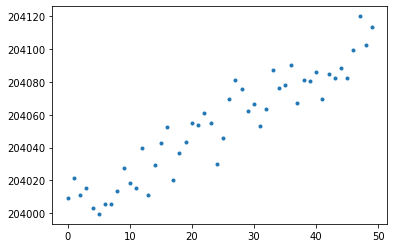

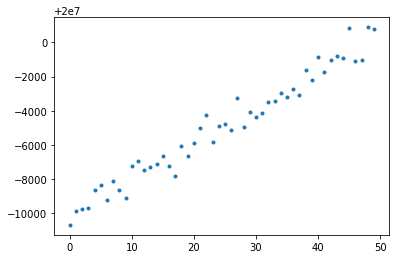

In [145]:
plt.plot(signals, '.')

plt.figure()
plt.plot(integrals, '.')

## Noise with aperture removed

In [236]:
dset_name = "1611707237 check noise with laser no aperture 60 dB "

In [237]:
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

print(f'{len(pxie)} samples')

n = pxie[1].shape[0]

t = np.arange(0,n,1)/100

pmt_data = np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])

300 samples


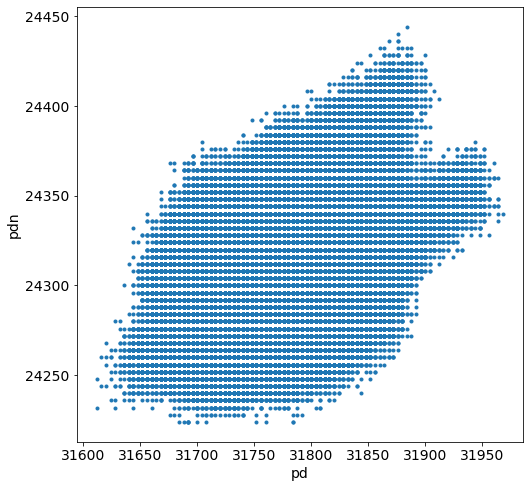

In [274]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(pd_data.reshape(-1), pdn_data.reshape(-1), '.')
ax.set_xlabel('pd')
ax.set_ylabel('pdn')
set_fontsize(ax, 14)

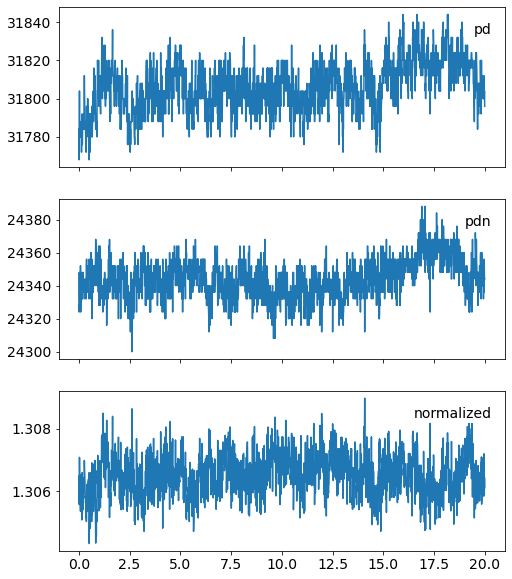

In [248]:
fig, axes = plt.subplots(nrows = 3, figsize = (8,10), sharex = True)
axes[0].plot(t, pd_data[0,:])
axes[1].plot(t, pdn_data[0,:])
axes[2].plot(t, pd_data[0,:]/pdn_data[0,:])

for ax, name in zip(axes, ['pd', 'pdn', 'normalized']):
    ax.text(0.97, 0.9, name, transform = ax.transAxes, fontsize = 14,
                  va = 'top', ha = 'right')
for ax in axes:
    set_fontsize(ax, 14)

In [262]:
std_pd = []
std_pdn = []
std_norm = []
for pd, pdn in zip(pd_data, pdn_data):
    std_pd.append(pd.std()/pd.mean())
    std_pdn.append(pdn.std()/pdn.mean())
    std_norm.append( (pd/pdn).std() / (pd/pdn).mean())

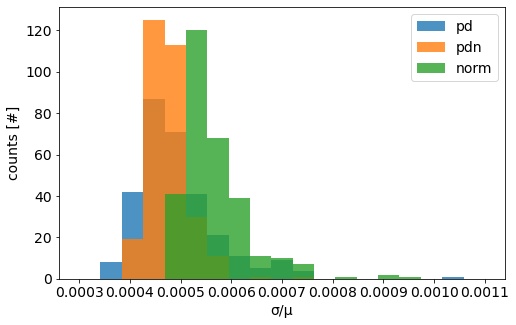

In [268]:
bins = np.linspace(0.0003, 0.0011, 20)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(std_pd, alpha = 0.8, label = 'pd', bins = bins, density = False)
ax.hist(std_pdn, alpha = 0.8, label = 'pdn', bins = bins, density = False)
ax.hist(std_norm, alpha = 0.8, label = 'norm', bins = bins, density = False)

ax.set_xlabel('σ/μ')
ax.set_ylabel('counts [#]')

ax.legend(fontsize = 14)
set_fontsize(ax, 14)